In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install pandas
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense, Input, Flatten, Concatenate, Dropout
from tensorflow.keras import Model
from tensorflow.keras.backend import clear_session

#Additional
from sklearn.preprocessing import MinMaxScaler, RobustScaler


In [3]:
df=pd.read_csv("C:\\Users\\Asus\\Desktop\\SalesDetail_Final.csv")

In [4]:
df.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Soldtopartner,Opportunityid,...,Area,Sales_Rep_Geo,Region,Discount_Category,Organization,Product_Type,Service_Period,Part_Num,Account_Coverage_type,Sales_Amount
0,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,CXA-07070,Private Sector,0.00
1,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,CXA-07070-CTO,Private Sector,0.00
2,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,LIC-CXA-07070-L,Private Sector,5850.00
3,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,NIC-1-001G-4TX-BP-C,Private Sector,856.05
4,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,OS-DEFAULT,Private Sector,0.00


In [5]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Week', 'Date', 'IsConditionalPO',
       'AccountID', 'Forecastcategory', 'Soldtopartner', 'Opportunityid',
       'Closedate', 'DiscountType', 'Order_Number', 'Area', 'Sales_Rep_Geo',
       'Region', 'Discount_Category', 'Organization', 'Product_Type',
       'Service_Period', 'Part_Num', 'Account_Coverage_type', 'Sales_Amount'],
      dtype='object')

In [ ]:
#df=df.drop(['Discount_Category','Account_Coverage_type','DiscountType','Soldtopartner','Service_Period','Product_Type','AccountID','Forecastcategory','Opportunityid','Order_Number','Area','Region','Organization','Product_Type','Service_Period','Part_Num','Account_Coverage_type'],axis=1)

**Creating Subsets from our main dataset to forecast for each region**

**Subset data for Americas Region**

In [6]:
df_Americas=df[df["Sales_Rep_Geo"]=='Americas']

In [7]:
df_Americas.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Soldtopartner,Opportunityid,...,Area,Sales_Rep_Geo,Region,Discount_Category,Organization,Product_Type,Service_Period,Part_Num,Account_Coverage_type,Sales_Amount
0,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,CXA-07070,Private Sector,0.00
1,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,CXA-07070-CTO,Private Sector,0.00
2,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,LIC-CXA-07070-L,Private Sector,5850.00
3,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,NIC-1-001G-4TX-BP-C,Private Sector,856.05
4,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,OS-DEFAULT,Private Sector,0.00


In [8]:
df_Americas1=df_Americas["Sales_Amount"]

In [9]:
df_Americas1.head()

0       0.00
1       0.00
2    5850.00
3     856.05
4       0.00
Name: Sales_Amount, dtype: float64

In [14]:
train_data=df_Americas1.iloc[0:126801,].reset_index()

In [16]:
train_data=train_data.drop(["index"],axis=1)

In [17]:
train_data.head()

,Sales_Amount
0,0.00
1,0.00
2,5850.00
3,856.05
4,0.00


In [21]:
test_data=df_Americas1.iloc[126802:156802].reset_index()

In [22]:
test_data=test_data.drop(["index"],axis=1)

In [23]:
test_data.head()

,Sales_Amount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [24]:
test_data.shape,train_data.shape

((30000, 1), (126801, 1))

In [25]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [26]:
train = train_data
scalers={}
for i in train_data.columns:
    scaler = RobustScaler()
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_data
for i in train_data.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s


In [27]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [71]:
n_past = 30
n_future = 1
n_features = 1

In [29]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [72]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(256,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(256, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
drop1 = Dropout(0.5)(decoder_l1)
decoder_l2 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
drop2 = Dropout(0.5)(decoder_l2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, 30, 256), (N 264192      input_3[0][0]                    
__________________________________________________________________________________________________
lstm_13 (LSTM)                  [(None, 256), (None, 525312      lstm_12[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 1, 256)       0           lstm_13[0][0]                    
______________________________________________________________________________________________

In [77]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())

history_e2d2=model_e2d2.fit(X_train,Y_train,epochs=2,validation_data=(X_val,Y_val),batch_size=128,verbose=1,callbacks=[earlystopping,reduce_lr])


Epoch 1/2
694/694 [==============================] - 523s 735ms/step - loss: 8.9059 - val_loss: 9.0904
Epoch 2/2
694/694 [==============================] - 504s 726ms/step - loss: 8.7305 - val_loss: 9.0149


In [61]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X_train,y_train,test_size=0.3)

ValueError: Found input variables with inconsistent numbers of samples: [88739, 126771]

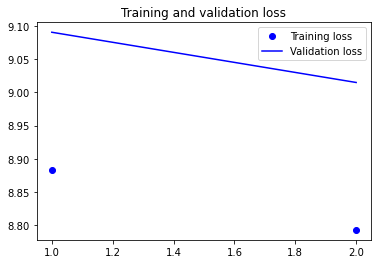

In [78]:

loss = history_e2d2.history['loss']
val_loss = history_e2d2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




In [80]:
pred = model_e2d2.predict(X_test)

In [89]:
pred=pred.reshape(-1,1)

In [90]:
pred.shape

(29970, 1)

In [91]:
pred_1 = scaler.inverse_transform(pred)


In [92]:
pred_1.shape

(29970, 1)

In [94]:
y_test.shape

(29970,)

In [51]:
y_test=y_test.reshape(-1)

In [53]:
y_test.shape

(29970,)

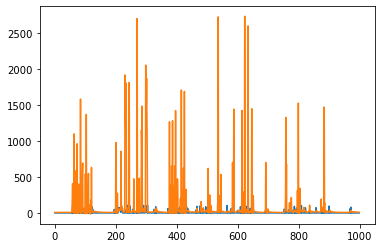

In [101]:

y_t = y_test[0:1000].reshape(1,-1)
y_hat = pred_1[0:1000].reshape(1,-1)
plt.plot(y_t[0])
plt.plot(y_hat[0])

# Area APJ

In [66]:
df_APJ=df[df["Sales_Rep_Geo"]=='APJ']

In [ ]:
df_APJ=df_APJ["Sales_Amount"]

In [ ]:
train_data=df_APJ.iloc[0:126801,].reset_index()

In [ ]:
train_data=train_data.drop(["index"],axis=1)

In [ ]:
test_data=df_APJ.iloc[126802:156802].reset_index()

In [ ]:
test_data=test_data.drop(["index"],axis=1)

In [ ]:
test_data.shape,train_data.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
train = train_data
scalers={}
for i in train_data.columns:
    scaler = RobustScaler()
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_data
for i in train_data.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s


In [ ]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [ ]:
n_past = 30
n_future = 1
n_features = 1

In [ ]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(256,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(256, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
drop1 = Dropout(0.5)(decoder_l1)
decoder_l2 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
drop2 = Dropout(0.5)(decoder_l2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())

history_e2d2=model_e2d2.fit(X_train,Y_train,epochs=50,validation_data=(X_val,Y_val),batch_size=128,verbose=1,callbacks=[earlystopping,reduce_lr])


In [ ]:

loss = history_e2d2.history['loss']
val_loss = history_e2d2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# Area EMEA

In [ ]:
df_EMEA=df[df["Sales_Rep_Geo"]=='EMEA']

In [ ]:
df_EMEA=df_EMEA["Sales_Amount"]

In [ ]:
train_data=df_EMEA.iloc[0:126801,].reset_index()

In [ ]:
train_data=train_data.drop(["index"],axis=1)

In [ ]:
test_data=df_EMEA.iloc[126802:156802].reset_index()

In [ ]:
test_data=test_data.drop(["index"],axis=1)

In [ ]:
test_data.shape,train_data.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
train = train_data
scalers={}
for i in train_data.columns:
    scaler = RobustScaler()
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_data
for i in train_data.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s


In [ ]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [ ]:
n_past = 30
n_future = 1
n_features = 1

In [ ]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(256,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(256, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
drop1 = Dropout(0.5)(decoder_l1)
decoder_l2 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
drop2 = Dropout(0.5)(decoder_l2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())

history_e2d2=model_e2d2.fit(X_train,Y_train,epochs=50,validation_data=(X_val,Y_val),batch_size=128,verbose=1,callbacks=[earlystopping,reduce_lr])


In [ ]:

loss = history_e2d2.history['loss']
val_loss = history_e2d2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# Area Xirrius

In [ ]:
df_Xirrus=df[df["Sales_Rep_Geo"]=='Xirrus']

df_Xirrus=df_Xirrus["Sales_Amount"]

train_data=df_Xirrus.iloc[0:126801,].reset_index()

train_data=train_data.drop(["index"],axis=1)

test_data=df_Xirrus.iloc[126802:156802].reset_index()

test_data=test_data.drop(["index"],axis=1)

test_data.shape,train_data.shape

from sklearn.preprocessing import MinMaxScaler, RobustScaler

train = train_data
scalers={}
for i in train_data.columns:
    scaler = RobustScaler()
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_data
for i in train_data.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s


def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

n_past = 30
n_future = 1
n_features = 1

X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(256,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(256, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
drop1 = Dropout(0.5)(decoder_l1)
decoder_l2 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
drop2 = Dropout(0.5)(decoder_l2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())

history_e2d2=model_e2d2.fit(X_train,Y_train,epochs=50,validation_data=(X_val,Y_val),batch_size=128,verbose=1,callbacks=[earlystopping,reduce_lr])


In [ ]:

loss = history_e2d2.history['loss']
val_loss = history_e2d2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# Area US-Public Sector

In [ ]:
df_USPS=df[df["Sales_Rep_Geo"]=='US - Public Sector']

df_USPS=df_USPS["Sales_Amount"]

train_data=df_USPS.iloc[0:126801,].reset_index()

train_data=train_data.drop(["index"],axis=1)

test_data=df_USPS.iloc[126802:156802].reset_index()

test_data=test_data.drop(["index"],axis=1)

test_data.shape,train_data.shape

from sklearn.preprocessing import MinMaxScaler, RobustScaler

train = train_data
scalers={}
for i in train_data.columns:
    scaler = RobustScaler()
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_data
for i in train_data.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s


def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

n_past = 30
n_future = 1
n_features = 1

X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(256,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(256, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
drop1 = Dropout(0.5)(decoder_l1)
decoder_l2 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
drop2 = Dropout(0.5)(decoder_l2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())

history_e2d2=model_e2d2.fit(X_train,Y_train,epochs=50,validation_data=(X_val,Y_val),batch_size=128,verbose=1,callbacks=[earlystopping,reduce_lr])


In [ ]:

loss = history_e2d2.history['loss']
val_loss = history_e2d2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

